In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
from pathlib import Path

from pyaw import utils
from pyaw.swarm import rotate_vector_by_quaternion

%load_ext watermark
%watermark -i -v -p matplotlib,numpy,pandas,scipy

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.27.0

matplotlib: 3.8.0
numpy     : 1.25.2
pandas    : 2.2.2
scipy     : 1.13.1



In [2]:
fps = [
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_OPER_MAGA_HR_1B\SW_OPER_MAGA_HR_1B_12728_20160301T012924_20160301T030258.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\auxiliaries\SW_OPER_MAGA_HR_1B\aux_SW_OPER_MAGA_HR_1B_12728_20160301T012924_20160301T030258.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\IGRF\SW_OPER_MAGA_HR_1B\IGRF_SW_OPER_MAGA_HR_1B_12728_20160301T012924_20160301T030258.pkl",
    r"\\Diskstation1\file_three\aw\swarm\vires\SW_EXPT_EFIA_TCT16\SW_EXPT_EFIA_TCT16_12728_20160301T012924_20160301T030258.pkl"
]

In [3]:
df_b = pd.read_pickle(fps[0])
# df_b_aux = pd.read_pickle(fps[1])
df_b_IGRF = pd.read_pickle(fps[2])
df_e = pd.read_pickle(fps[3])

In [4]:
df_b_clip = df_b[['B_NEC', 'Longitude', 'Latitude', 'Radius', 'q_NEC_CRF']]
# df_b_aux_clip = df_b_aux[['QDLat', 'QDLon', 'MLT']]
df_b_IGRF_clip = df_b_IGRF[['B_NEC_IGRF']]
df_e_clip = df_e[['Longitude', 'Latitude', 'Radius', 'VsatE', 'VsatN', 'Ehy', 'Ehx']]

In [5]:
df_b_IGRF_clip['B_NEC_IGRF'].values

array([array([28378.72038199,  3614.05737597, -6365.53751506]),
       array([28378.68724856,  3613.95824236, -6364.18224926]),
       array([28378.65410128,  3613.85910371, -6362.82711888]), ...,
       array([30314.84425103,  1252.54627718, -8851.01808411]),
       array([30314.9280899 ,  1252.43707764, -8849.51903761]),
       array([30315.01189432,  1252.32788207, -8848.01998685])],
      dtype=object)

In [6]:
np.vstack(df_b_IGRF_clip['B_NEC_IGRF'].values)

array([[28378.72038199,  3614.05737597, -6365.53751506],
       [28378.68724856,  3613.95824236, -6364.18224926],
       [28378.65410128,  3613.85910371, -6362.82711888],
       ...,
       [30314.84425103,  1252.54627718, -8851.01808411],
       [30314.9280899 ,  1252.43707764, -8849.51903761],
       [30315.01189432,  1252.32788207, -8848.01998685]])

(array([16861.0625    , 16861.07291667, 16861.08333333, 16861.09375   ,
        16861.10416667, 16861.11458333, 16861.125     ]),
 [Text(16861.0625, 0, '01 01:30'),
  Text(16861.072916666668, 0, '01 01:45'),
  Text(16861.083333333332, 0, '01 02:00'),
  Text(16861.09375, 0, '01 02:15'),
  Text(16861.104166666668, 0, '01 02:30'),
  Text(16861.114583333332, 0, '01 02:45'),
  Text(16861.125, 0, '01 03:00')])

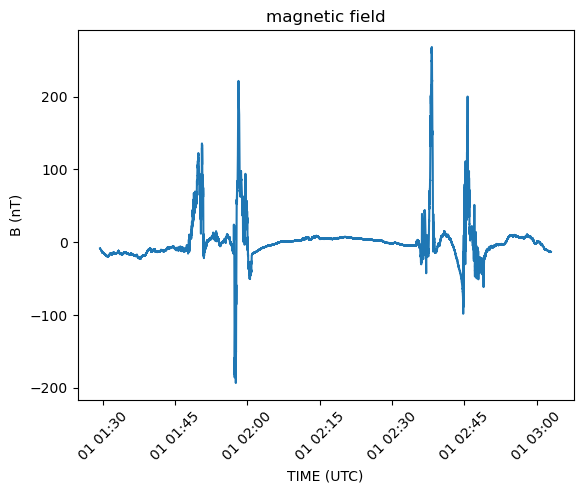

In [15]:
def calculate_rotated_vectors(B_NEC, B_NEC_IGRF, q_NEC_CRF):
    b_sc = []  # b in S/C
    b_igrf_sc = []  # igrf b in S/C
    for b_nec, b_nec_igrf, q_NEC_CRF in zip(B_NEC, B_NEC_IGRF, q_NEC_CRF):
        q_CRF_NEC = np.array([-q_NEC_CRF[0], -q_NEC_CRF[1], -q_NEC_CRF[2], q_NEC_CRF[3]])
        b_sc.append(rotate_vector_by_quaternion(b_nec, q_CRF_NEC))
        b_igrf_sc.append(rotate_vector_by_quaternion(b_nec_igrf, q_CRF_NEC))
    b_sc = np.array(b_sc)
    b_igrf_sc = np.array(b_igrf_sc)
    return b_sc, b_igrf_sc


b_sc,b_igrf_sc = calculate_rotated_vectors(df_b_clip['B_NEC'].values, df_b_IGRF_clip['B_NEC_IGRF'].values, df_b_clip['q_NEC_CRF'].values)

by1 = b_sc[:, 1] - b_igrf_sc[:, 1]

plt.plot(df_b_clip.index.values, by1)
plt.title("magnetic field")
plt.xlabel("TIME (UTC)")
plt.ylabel("B (nT)")
plt.xticks(rotation=45)

In [16]:
by1

array([ -8.54805451,  -8.58490815,  -8.62414156, ..., -13.51453158,
       -13.48961111, -13.48081418])

In [14]:
df_b_clip['B_NEC'].values

array([array([28373.8738,  3605.1591, -6341.1843]),
       array([28373.8526,  3605.0237, -6339.8478]),
       array([28373.8628,  3604.8871, -6338.4731]), ...,
       array([30319.5638,  1239.2292, -8840.1233]),
       array([30319.6374,  1239.1442, -8838.5989]),
       array([30319.7208,  1239.0438, -8837.1019])], dtype=object)

In [13]:
b_sc

array([[28469.26741764,  2315.90619988, -6513.20934462],
       [28469.24751299,  2315.78602184, -6511.87057254],
       [28469.25915139,  2315.66345912, -6510.49370684],
       ...,
       [30284.20984297,  -637.1521314 , -9023.3080721 ],
       [30284.28825423,  -637.22136593, -9021.78230695],
       [30284.37527395,  -637.3066567 , -9020.28394676]])